### Реализовать в параллельном режиме поиск строки с максимальной суммой элементов в симметричной разреженной матрице в схеме Дженнингса (см. ТСД). Матрицу не распаковывать.

In [56]:
from random import randint
import numpy as np
import scipy
from scipy.sparse import rand
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=16,12

In [62]:
RANGE = 8

def randSymMatrix(rank, density=0.2, format='coo', dtype=np.int8):
    m = scipy.sparse.rand(rank, rank, density=density, format=format, dtype=dtype)
    m = m.todense() % RANGE
#     m = toHalfMatrix(m)
    return m


def randLinearPattern(rank, density=0.01, center=1.05, dtype=np.int8):
    m = randSymMatrix(rank, density, dtype=dtype)
    for i in range(rank):
        for j in range(i+1):
            if i == j:
                if not m[i,j]:
                    m[i,j] = randint(1,RANGE)
            else:
                if not randint(0, int((i-j)**center)):
                    m[i,j] = randint(1,RANGE)
    return m


def toJennings(m):
    AN = []
    IA = []
    try: m = m.tolist()
    except: pass
    l = len(m[0])
    for i in range(l):
        for j in range(i+1):
            if m[i][j]:
                AN += m[i][j:i+1]
                IA.append(len(AN))
                break
    return np.array(AN), np.array(IA)


def jenningsToMatrix(AN, IA):
    m = []
    l = len(IA)
    start = 0
    for i in range(l):
        end = IA[i]
        a = [0]*(i+1+start-end) + AN[start:end] + [0]*(l-i-1)
        m.append(a)
        start = end
    return np.matrix(m)


# change source matrix
def toHalfMatrix(m):
    l = m.shape[0]
    for i in range(l-1):
        for j in range(i+1, l):
            m[i,j] = 0
    return m


# change source matrix
def toFullMatrix(m):
    l = m.shape[0]
    for i in range(l-1):
        for j in range(i+1, l):
            m[i,j] = m[j,i]
    return m


def plotMatrix(m):
    try: toFullMatrix(m)
    except: pass
    plt.imshow(m, interpolation='none', cmap='binary')
    plt.colorbar()


def toJenningsFile(path, m):
    AN, IA = toJennings(m)
    with open(path, 'w') as f:
        f.write(','.join(map(str, AN)))
        f.write('\n')
        f.write(','.join(map(str, IA)))
        f.write('\n')
        f.write(str(np.sum(m, axis=0).argmax()))

AN = [7 6 1 4 5 2 0 3 3 7 0 0 8 2 5 0 0 5 8 8 4 0 0 3 4 8 0 0 3 0 2 8 8 6]


IA = [ 1  2  5  9 13 18 20 25 31 34]


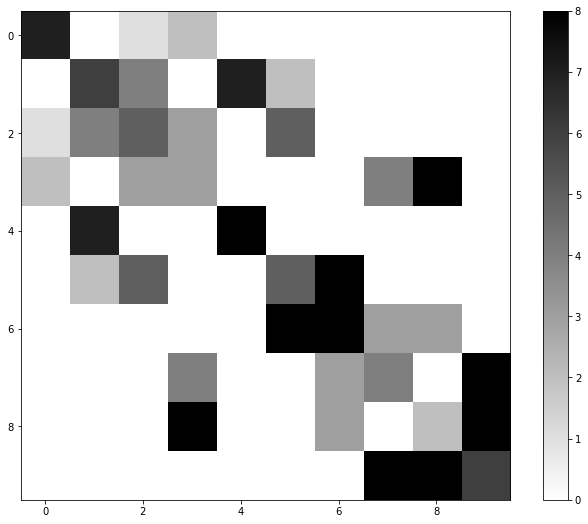

In [95]:
# A = randLinearPattern(10, 0.01, 1.15)
plotMatrix(A)
AN, IA = toJennings(A)
np.set_printoptions(edgeitems=5, threshold=50)
print('AN =', AN)
print('\n')
print('IA =', IA)
plt.savefig('img.png', bbox_inches = 'tight')

In [53]:
toJenningsFile('data/10.txt', A)

In [54]:
print(A)
a = np.sum(A, axis=0)
print(a)
a.argmax()

[[5 0 0 7 0 0 3 0 0 0]
 [0 8 7 0 0 5 0 0 0 0]
 [0 7 2 0 0 0 0 0 0 7]
 [7 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 1 5 0 0 0 0]
 [0 5 0 0 5 4 0 0 0 0]
 [3 0 0 0 0 0 3 1 0 5]
 [0 0 0 0 0 0 1 4 0 8]
 [0 0 0 0 0 0 0 0 5 8]
 [0 0 7 0 0 0 5 8 8 8]]
[[15 20 16 11  6 14 12 13 13 36]]


9

In [71]:
for i in range(100,1100,100):
    m = randLinearPattern(i, 0.01, 1.15)
    toJenningsFile(f'data/{i}.txt', m)

In [47]:
i = 10
m = randLinearPattern(i, 0.01, 1.15)
toJenningsFile(f'data/{i}.txt', m)

447785


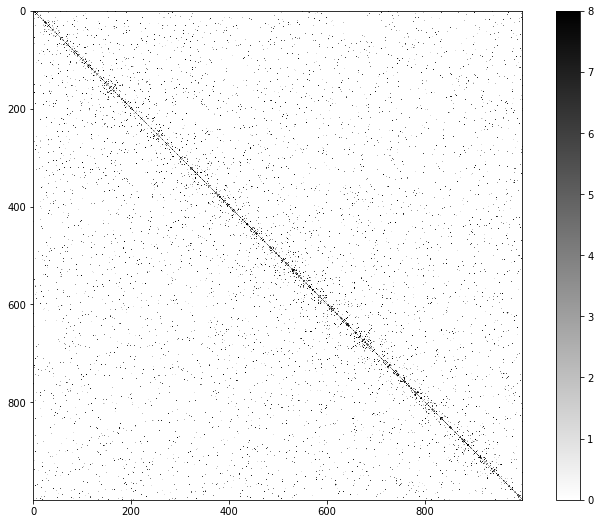

In [93]:
t = randLinearPattern(1000, 0.018, 1.05)
an, ia = toJennings(t)
print(len(an))
plotMatrix(t)
plt.savefig('img1.png', bbox_inches = 'tight')

448304


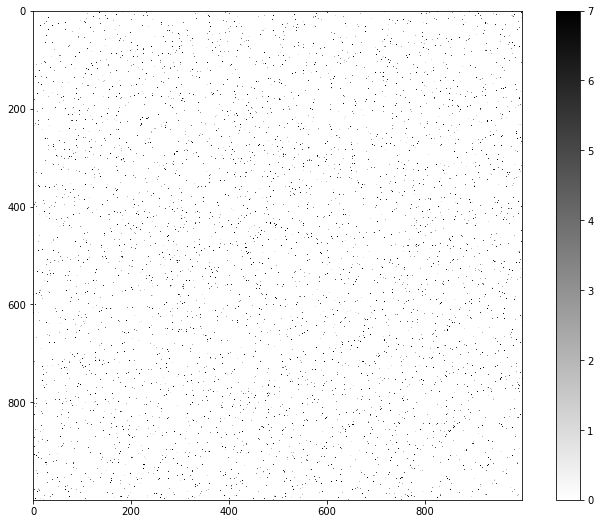

In [91]:
t = randSymMatrix(1000, 0.020)
an, ia = toJennings(t)
print(len(an))
plotMatrix(t)
plt.savefig('img2.png', bbox_inches = 'tight')